In [1]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting
import matplotlib.cbook as cbook
import matplotlib.image as image
from fastf1 import plotting

In [2]:
fastf1.Cache.enable_cache("cache")

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
driver = input('Piloto: ')

Año: 2022
Round: 11
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto: LEC


In [4]:
session = fastf1.get_session(year, wknd, ses)

session.load()
fast_driver = session.laps.pick_driver(driver).pick_fastest()
driver_car_data = fast_driver.get_car_data()
print(driver_car_data)
t = driver_car_data['Time']
vCar = driver_car_data['Speed']
piloto = session.get_driver(driver)
print(piloto)

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '44', '63', '31', '47', '4', '20', '3', '14', '77', '23', '18', '24', '10', '22', '5', '55', '6', '11']


                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2022-07-10 14:16:12.478  11361    282      7       100  False    0    car   
1   2022-07-10 14:16:12.838  11510    287      7       100  False    0    car   
2   2022-07-10 14:16:13.118  11577    289      7       100  False    0    car   
3   2022-07-10 14:16:13.558  10659    292      7       100  False    0    car   
4   2022-07-10 14:16:13.798  10435    294      8       100  False    0    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
243 2022-07-10 14:17:18.758  10788    268      7       100  False    0    car   
244 2022-07-10 14:17:18.998  10907    270      7       100  False    0    car   
245 2022-07-10 14:17:19.278  11042    274      7       100  False    0    car   
246 2022-07-10 14:17:19.478  11144    276      7       100  False    0    car   
247 2022-07-10 14:17:19.718  11259    282      7       100  False    0    car   

                      Time 

In [7]:
color1 = fastf1.plotting.driver_color(driver)

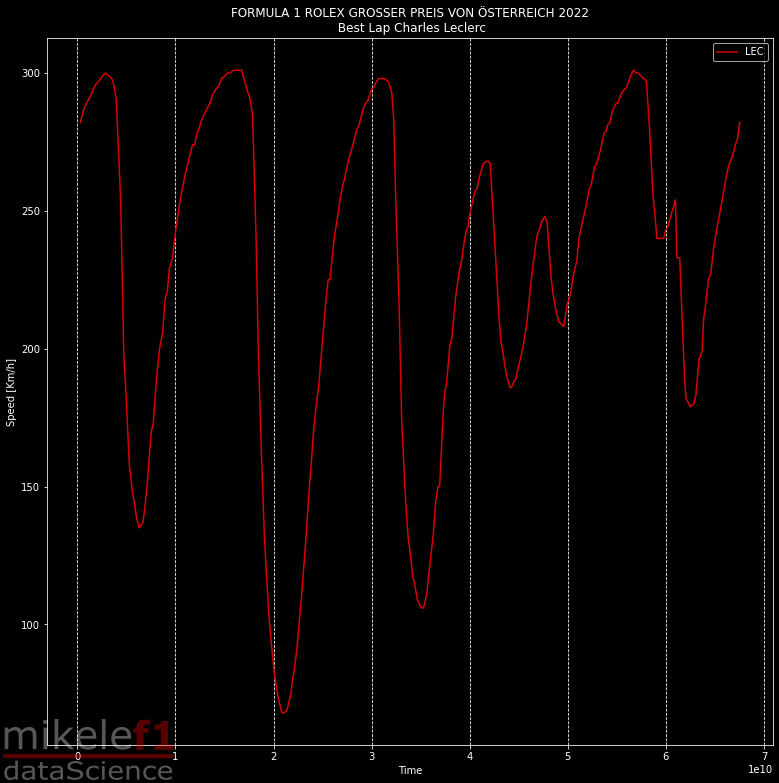

In [15]:


# The rest is just plotting
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)
    
    #Modo oscuro
plt.style.use('dark_background')

plt.rcParams['figure.figsize'] = [13, 13]


    
fig, ax = plt.subplots()
ax.plot(t, vCar, label=driver, color=color1)
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title(piloto['FullName'])
ax.xaxis.grid(True, which='major', linestyle='--', color='white', zorder=-1000)

ax.set_title(session.event['OfficialEventName']+"\n Best Lap "+piloto['FullName'])


ax.legend()

fig.figimage(im, 3, 3, zorder=13, alpha=.35)

plt.show()